In [137]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Lab 2
These exercises focus on Pandas. Work through all exercises, searching for help when you need to (ie. frequently).

In [9]:
import pandas as pd

__EXERCISE 1: Pie shop__

_Objective: Create and manipulate DataFrames_
* Create a DataFrame with three columns: month, apple_pie_sales, blueberry_pie_sales
* Summarize which products sold best
* Create a new column to summarize revenues

In [117]:
# YOUR CODE HERE: create the df using the data supplied

sales_data = {'months' : ['Jan','Feb', 'Mar', 'Apr'],
                'apple_pie_sales' : [34, 19, 28, 45],
                'blueberry_pie_sales' : [18, 6, 15, 51]}

sales_dataframe = pd.DataFrame(sales_data)
sales_dataframe

,months,apple_pie_sales,blueberry_pie_sales
0,Jan,34,18
1,Feb,19,6
2,Mar,28,15
3,Apr,45,51


In [109]:
# YOUR CODE HERE: calculate total sales of apple pies and total sales of blueberry pies
total_apple_sales = np.sum(sales_dataframe['apple_pie_sales'])

total_blueberry_sales = np.sum(sales_dataframe['blueberry_pie_sales'])
total_blueberry_sales


90

In [131]:
# YOUR CODE HERE: create a new columns entitled apple_pie_revenue and blueberry_pie_revenue

# Hint: revenue = units sold * price. Use the prices below.
apple_pie_price = 12
blueberry_pie_price = 15
apple_pie_revenue = sales_dataframe['apple_pie_sales'] * apple_pie_price
sales_dataframe['apple_pie_revenue'] = apple_pie_revenue
sales_dataframe

0    408
1    228
2    336
3    540
Name: apple_pie_sales, dtype: int64


,months,apple_pie_sales,blueberry_pie_sales,apple_pie_revenue
0,Jan,34,18,408
1,Feb,19,6,228
2,Mar,28,15,336
3,Apr,45,51,540


In [133]:
blueberry_pie_price = 15
blueberry_pie_revenue = sales_dataframe['blueberry_pie_sales'] * blueberry_pie_price
sales_dataframe['blueberry_pie_revenue'] = blueberry_pie_revenue
sales_dataframe

,months,apple_pie_sales,blueberry_pie_sales,apple_pie_revenue,blueberry_pie_revenue
0,Jan,34,18,408,270
1,Feb,19,6,228,90
2,Mar,28,15,336,225
3,Apr,45,51,540,765


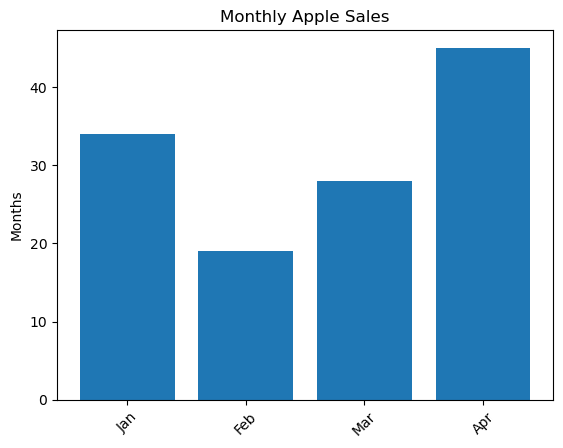

In [165]:
# BONUS: find a way to plot bar charts and pie charts (ha) of the shop's sales
months = sales_dataframe['months']
apple_sales =sales_dataframe['apple_pie_sales']
blueberry_sales =sales_dataframe['blueberry_pie_sales']
months

plt.bar(months, apple_sales)
plt.title('Monthly Apple Sales')
plt.ylabel('Sales')
plt.ylabel('Months')
plt.xticks(months, rotation=45)
plt.show()

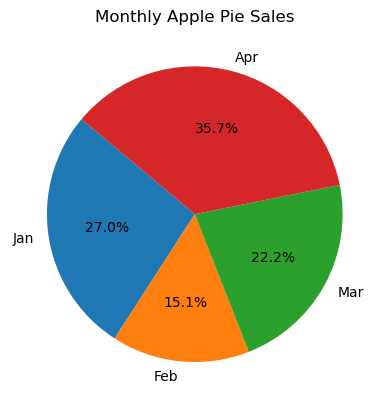

In [169]:
months = sales_dataframe['months']
apple_sales =sales_dataframe['apple_pie_sales']

plt.pie(apple_sales, autopct='%1.1f%%', labels=months, startangle=140)
plt.title('Monthly Apple Pie Sales')
plt.show()

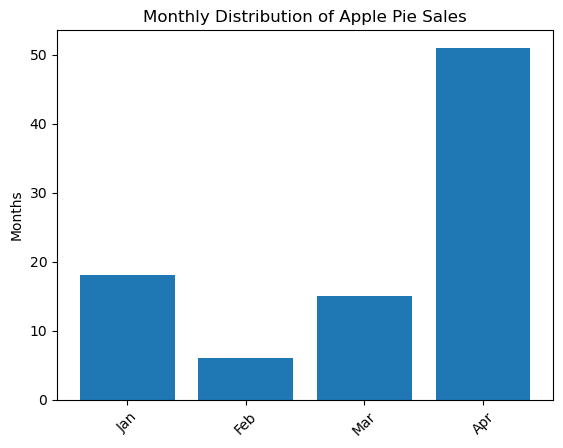

In [167]:
months = sales_dataframe['months']
blueberry_sales =sales_dataframe['blueberry_pie_sales']

plt.bar(months,blueberry_sales)
plt.title('Monthly Distribution of Apple Pie Sales')
plt.ylabel('Sales')
plt.ylabel('Months')
plt.xticks(months, rotation=45)
plt.show()

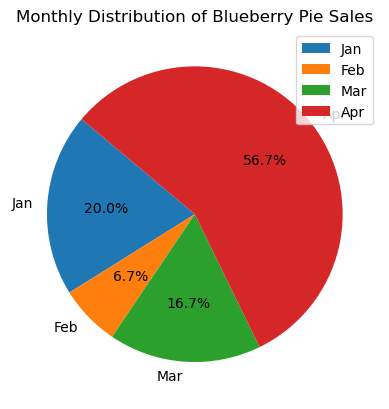

In [171]:
months = sales_dataframe['months']
blueberry_sales =sales_dataframe['blueberry_pie_sales']

plt.pie(blueberry_sales, autopct='%1.1f%%', labels=months, startangle=140)
plt.title('Monthly Distribution of Blueberry Pie Sales')
plt.legend()
plt.show()

__EXERCISE 2: NYC housing__

_Objective: clean and manipulate a real-world dataset_

We are using the PLUTO (Primary Land Use Tax Lot Output) database, which lists every building in New York City.
Source is [NYC Open Data Portal](https://www1.nyc.gov/site/planning/data-maps/open-data/dwn-pluto-mappluto.page). Check the [data dictionary](https://www1.nyc.gov/assets/planning/download/pdf/data-maps/open-data/pluto_datadictionary.pdf?r=18v2beta).

In [175]:
url = 'pluto_shorter.csv'
df = pd.read_csv(url)

C:\Users\ErickOndiwa\AppData\Local\Temp\ipykernel_7888\4172945960.py:2: DtypeWarning: Columns (18,19,21,23,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


,Unnamed: 0,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,...,firm07_flag,pfirm15_flag,rpaddate,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate,edesigdate
0,0,BX,5641.0,670.0,210.0,516.00,2.0,NaN,13.0,NaN,...,1.0,1.0,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
1,20,QN,4671.0,39.0,407.0,1039.00,2011.0,25.0,19.0,11357.0,...,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
2,40,BK,3925.0,32.0,305.0,1172.02,2004.0,19.0,37.0,11208.0,...,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
3,60,MN,1836.0,19.0,107.0,189.00,2002.0,3.0,7.0,10025.0,...,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
4,80,QN,8898.0,16.0,409.0,4.00,2001.0,27.0,30.0,11421.0,...,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018


__Step 1: Inspect and prepare the dataset__

In [4]:
# Use df.head() to see the first five rows. A bit messy, no?
df.head()

,Unnamed: 0,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,...,firm07_flag,pfirm15_flag,rpaddate,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate,edesigdate
0,0,BX,5641.0,670.0,210.0,516.00,2.0,NaN,13.0,NaN,...,1.0,1.0,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
1,20,QN,4671.0,39.0,407.0,1039.00,2011.0,25.0,19.0,11357.0,...,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
2,40,BK,3925.0,32.0,305.0,1172.02,2004.0,19.0,37.0,11208.0,...,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
3,60,MN,1836.0,19.0,107.0,189.00,2002.0,3.0,7.0,10025.0,...,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
4,80,QN,8898.0,16.0,409.0,4.00,2001.0,27.0,30.0,11421.0,...,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018


In [17]:
# We'll select some columns to keep
df.columns

Index(['Unnamed: 0', 'borough', 'block', 'lot', 'cd', 'ct2010', 'cb2010',
       'schooldist', 'council', 'zipcode', 'firecomp', 'policeprct',
       'healtharea', 'sanitboro', 'sanitsub', 'address', 'zonedist1',
       'zonedist2', 'zonedist3', 'zonedist4', 'overlay1', 'overlay2',
       'spdist1', 'spdist2', 'spdist3', 'ltdheight', 'splitzone', 'bldgclass',
       'landuse', 'easements', 'ownertype', 'ownername', 'lotarea', 'bldgarea',
       'comarea', 'resarea', 'officearea', 'retailarea', 'garagearea',
       'strgearea', 'factryarea', 'otherarea', 'areasource', 'numbldgs',
       'numfloors', 'unitsres', 'unitstotal', 'lotfront', 'lotdepth',
       'bldgfront', 'bldgdepth', 'ext', 'proxcode', 'irrlotcode', 'lottype',
       'bsmtcode', 'assessland', 'assesstot', 'exemptland', 'exempttot',
       'yearbuilt', 'yearalter1', 'yearalter2', 'histdist', 'landmark',
       'builtfar', 'residfar', 'commfar', 'facilfar', 'borocode', 'bbl',
       'condono', 'tract2010', 'xcoord', 'ycoord'

In [18]:
# Note how this syntax works. You could add extra columns that interest you.
my_cols = ['borough','numfloors','yearbuilt', 'landuse', 'zipcode', 'assesstot', 'xcoord','ycoord']
df = df[my_cols]

In [19]:
# Cleaner now, right?
df.head()

,borough,numfloors,yearbuilt,landuse,zipcode,assesstot,xcoord,ycoord
0,BX,0.00,0.0,7.0,NaN,59400.0,1044510.0,246734.0
1,QN,2.50,1925.0,1.0,11357.0,29738.0,1035479.0,223657.0
2,BK,2.75,1920.0,1.0,11208.0,27370.0,1015989.0,187871.0
3,MN,6.00,1900.0,2.0,10025.0,510300.0,994273.0,228915.0
4,QN,2.00,1901.0,1.0,11421.0,29020.0,1021269.0,190793.0


In [20]:
# Here is the key that translates NYC's land use codes into plain English (p. 17 of the data dictionary)
# We'll use the df.map() method to replace the numbers with text we can understand

# BONUS POINTS: repeat this step to substitute the short borough names (eg. MN) with the actual
# full borough names (eg. MN becomes Manhattan).

land_use_dict = {1: 'One & Two Family Buildings',
                2: 'Multi-Family Walk-Up Buildings',
                3: 'Multi-Family Elevator Buildings',
                4: 'Mixed Residential & Commercial Buildings',
                5: 'Commercial & Office Buildings',
                6: 'Industrial & Manufacturing',
                7: 'Transportation & Utility',
                8: 'Public Facilities & Institutions',
                9: 'Open Space & Outdoor Recreation',
                10: 'Parking Facilities',
                11: 'Vacant Land'}

df['landuse'] = df['landuse'].map(land_use_dict)

In [189]:
borough_dict = {
    'BX': 'Bronx',
    'QN': 'Queens',
    'BK': 'Brooklyn',
    'MN': 'Manhattan',
    'SI': 'Staten Island'
}
df['borough'] = df['borough'].map(borough_dict)

In [191]:
# Cleaner now, right? Add any more data cleaning steps of your choice.

df.head()

,Unnamed: 0,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,...,firm07_flag,pfirm15_flag,rpaddate,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate,edesigdate
0,0,Bronx,5641.0,670.0,210.0,516.00,2.0,NaN,13.0,NaN,...,1.0,1.0,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
1,20,Queens,4671.0,39.0,407.0,1039.00,2011.0,25.0,19.0,11357.0,...,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
2,40,Brooklyn,3925.0,32.0,305.0,1172.02,2004.0,19.0,37.0,11208.0,...,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
3,60,Manhattan,1836.0,19.0,107.0,189.00,2002.0,3.0,7.0,10025.0,...,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
4,80,Queens,8898.0,16.0,409.0,4.00,2001.0,27.0,30.0,11421.0,...,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018


__Step 2: Summarize data using mean(), min/max(), describe() etc.__
* Find out the average price of a building in Manhattan (MN) compared with Queens (QN)
* What was the most expensive building built in the year you were born?
* Compare average building

BONUS: find the average price for buildings in Brooklyn with 5-10 floors built between 2000-2010. Do the same for buildings in Manhattan and Queens with those characteristics.

In [203]:
# YOUR CODE HERE:
# Find out the average price of a building in Manhattan (MN) compared with Queens (QN)

manhattan =  df[df['assesstot'] and df[df['borough']]]
manhattan
# max_price = pd.max(df.loc)

0         59400.0
1         29738.0
2         27370.0
3        510300.0
4         29020.0
           ...   
42945      2466.0
42946     18630.0
42947     31608.0
42948      1370.0
42949     17865.0
Name: assesstot, Length: 42950, dtype: float64

__Step 3: Exploratory visualization using Pandas plotting__

In [12]:
# Try using the function pandas.Series.value_counts
# It returns the unique count of values in a column
# BONUS: Could you produce this output only for Brooklyn?

df.landuse.value_counts()

One & Two Family Buildings                  28259
Multi-Family Walk-Up Buildings               6408
Mixed Residential & Commercial Buildings     2813
Vacant Land                                  1358
Commercial & Office Buildings                1060
Multi-Family Elevator Buildings               639
Public Facilities & Institutions              633
Industrial & Manufacturing                    544
Parking Facilities                            520
Transportation & Utility                      351
Open Space & Outdoor Recreation               231
Name: landuse, dtype: int64

__YOUR ACTION__: Look up the [pandas.Series.plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.html) function, and some [examples of how to use it](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html).

Explore any questions that interest you about New York City's buildings by plotting charts, for example:
* How does price vary with age? (scatter of age vs. price)
* Does the breakdown of building types differ between boroughs? (pie chart of landuse)
* Which zip codes have most and fewest buildings?
* Where are the buildings located? (hint: try a scatter plot of xcoord and ycoord)


In [ ]:
# YOUR CODE HERE:


#### BONUS ADVANCED QUESTION!
Impute missing values for year_built using a custom strategy:
* Replace all NaNs with the mean year_built for buildings of the same `landuse`.
* More advanced version: replace all NaNs with mean `year_built` for buildings of the same `landuse` in the same borough. (eg. multi-family buildings in Brooklyn)

In [22]:
df.isnull().sum()

borough         0
numfloors      30
yearbuilt      20
landuse       134
zipcode      1050
assesstot      20
xcoord         52
ycoord         52
dtype: int64